### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- esc: 셀 나가기
- m: 마크다운 셀로 바꾸기
- y: 마크다운 셀을 다시 Code로 바꾸기

# 03장_텐서플로 2.0 시작하기

## 3.1 Hello World

In [1]:
print("Hello, World!")

Hello, World!


## 3.2 Hello 텐서플로 2.0

In [4]:
# 버전 정보 확인
import tensorflow as tf

print(tf.__version__)

2.3.0


## 3.3 텐서플로 기초

### 3.3.1 난수 생성
- 현재 가장 많이 쓰이는 방법은 Xavier 초기화(Xavier Initialization)와 He 초기화(He Initialization) --> 랜덤하지만 어느 정도 규칙성이 있는 범위 내에서 난수를 지정


In [6]:
# Uniform dist. 1X1
rand = tf.random.uniform([1], 0, 1)
print(rand)

tf.Tensor([0.9592954], shape=(1,), dtype=float32)


In [8]:
# Uniform dist. 2X1
rand = tf.random.uniform([2,1], 0, 1)
print(rand)

tf.Tensor(
[[0.42310596]
 [0.24514914]], shape=(2, 1), dtype=float32)


In [9]:
# Uniform dist. 2X2
rand = tf.random.uniform([2,2], 0, 1)
print(rand)

tf.Tensor(
[[0.5057939  0.31141078]
 [0.4311602  0.88888943]], shape=(2, 2), dtype=float32)


In [10]:
# Uniform dist. 1X4
rand = tf.random.uniform([4], 0, 1)
print(rand)

tf.Tensor([0.08824897 0.99933374 0.20741594 0.8755815 ], shape=(4,), dtype=float32)


In [11]:
# Normal dist. 1X1
rand = tf.random.normal([4], 0, 1)
print(rand)

tf.Tensor([ 0.16929848  0.81314826 -0.7906293  -0.10902788], shape=(4,), dtype=float32)


### 3.3.2 뉴런 만들기

In [27]:
import math
def sigmoid(x):
    return 1  / (1 + math.exp(-x))

In [15]:
# 입력이 1일 때 기대출력이 0이 되는 뉴런
x = 1
y = 0
w = tf.random.normal([1], 0, 1)
output = sigmoid(x * w)
print(output)

0.7490002452186378


- 기대출력인 0과 실제 출력인 위의 값의 차이를 error라고 함
- 뉴런의 학습은 이 에러가 0에 가까워지게 해서 출력으로 기댓값에 가까운 값을 얻는 것

### 뉴런 w를 변화시키기 위해 경사 하강법(Gradient Descent) 방법을 사용
### $w= w + x + \alpha * error$

In [17]:
for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 -0.12118291559339876 0.12118291559339876
199 -0.05724309090367733 0.05724309090367733
299 -0.03699137896230839 0.03699137896230839
399 -0.02722422340571566 0.02722422340571566
499 -0.02150439343009889 0.02150439343009889
599 -0.017756829971302374 0.017756829971302374
699 -0.015114762932601548 0.015114762932601548
799 -0.013153287930312308 0.013153287930312308
899 -0.011640221647798028 0.011640221647798028
999 -0.010437951954354343 0.010437951954354343


In [19]:
# 입력이 0일 때 기대출력이 1이 되는 뉴런
x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w)
    error = y - output
    w = w + x * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [21]:
# 위와 같은 경우를 방지하기 위해 편향(bias)을 뉴런에 넣어줌

x = 0
y = 1
w = tf.random.normal([1], 0, 1)
b = tf.random.normal([1], 0, 1)

for i in range(1000):
    output = sigmoid(x * w + 1 * b)
    error = y - output
    w = w + x * 0.1 * error
    b = b + 1 * 0.1 * error
    
    if i % 100 == 99:
        print(i, error, output)

99 0.09945054622339788 0.9005494537766021
199 0.0515990800936027 0.9484009199063973
299 0.034506426804321255 0.9654935731956787
399 0.02584214508886773 0.9741578549111323
499 0.020628313452252134 0.9793716865477479
599 0.01715318721387049 0.9828468127861295
699 0.014674110010313268 0.9853258899896867
799 0.012817738429323766 0.9871822615706762
899 0.011376302761419765 0.9886236972385802
999 0.01022502024570493 0.9897749797542951


### 3.3.3 첫 번째 신경망 네트워크: AND
- AND 연산을 수행하는 뉴런을 만들자


In [22]:
print(int(True))
print(int(False))

1
0


In [28]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error= y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11439867878103463
399 -0.06712168501009713
599 -0.047396242612605284
799 -0.03652326722591817
999 -0.029652088580179103
1199 -0.02492748055797077
1399 -0.02148439521596571
1599 -0.018868294878815986
1799 -0.016811872512395548
1999 -0.015156124674934983


In [30]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1
for i in range(2000):
    error_sum=0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error= y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += abs(error)
    
    if i % 200 == 199:
        print(i, error_sum)

199 0.6032561971013332
399 0.36798736846436264
599 0.2629875681558682
799 0.20381062847949738
999 0.16601250276282542
1199 0.1398595344914148
1399 0.12072564129758426
1599 0.10613771470278684
1799 0.0946580975238987
1999 0.08539520877100702


In [24]:
# list에 정수를 곱하면 양수일 경우 숫자만큼 리스트 원소 반복, 0 이하일 경우 빈 리스트 반환
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


In [25]:
# list에 실수 곱하면 error 발생
print([1,2,3]*0.01)

TypeError: can't multiply sequence by non-int of type 'float'

In [28]:
# numpy에 실수를 곱하면 각 원소에 대해 자동으로 실수를 곱하는 연산이 이루어짐 (element-wise)
print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.1)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.1 0.2 0.3]


In [29]:
# 학습시킨 AND 네트워크가 정상적으로 작동하는지 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9642602375508704
X: [1 0] Y: [0] Output: 0.025323224879098685
X: [0 1] Y: [0] Output: 0.025402009840480282
X: [0 0] Y: [0] Output: 2.5098482574181813e-05


### 3.3.4 두 번째 신경망 네트워크: OR
- OR 연산을 수행하는 뉴런을 만들자


In [31]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])
w = tf.random.normal([2], 0,1)
b = tf.random.normal([1], 0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 -0.050392696537049225
399 -0.026134868149809948
599 -0.017518316152399682
799 -0.013126941353605232
999 -0.010476166131042339
1199 -0.008707069866256835
1399 -0.007444334586758777
1599 -0.00649845947510512
1799 -0.005764587371048652
1999 -0.005177255320883204


In [32]:
# 학습시킨 OR 네트워크가 정상적으로 작동하는지 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.999997160124739
X: [1 0] Y: [1] Output: 0.989731935754309
X: [0 1] Y: [1] Output: 0.9897160095422278
X: [0 0] Y: [0] Output: 0.025667624200744272


### 3.3.5 세 번째 신경망 네트워크: XOR
- XOR 연산을 수행하는 뉴런을 만들자


In [33]:
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])
w = tf.random.normal([2], 0,1)
b = tf.random.normal([1], 0,1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
        
    if i % 200 == 199:
        print(i, error_sum)

199 0.00026310942447083097
399 1.0692023553637853e-05
599 4.420875421295989e-07
799 1.8614211283463078e-09
999 1.8614210173240053e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


- Error가 줄어달다, 어느순간 고정됨

In [34]:
# 학습시킨 XOR 네트워크가 정상적으로 작동하는지 평가
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [35]:
# x가 변해도 Output은 0.5 근처에 있음
# output 공식을 구성하는 w와 b를 출력해보면 다음과 같다.

print('w:', w)
print('b:', b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


- 중간 계산 값이 0에 가까워지기 때문에 최종 출력이 0.5에 가까워지는 것임
#### -> 하나의 퍼셉트론으로는 간단한 XOR 연산자도 만들어낼 수 없다는 것으로, 여러 개의 퍼셉트론을 사용해야 함

In [5]:
import numpy as np

In [15]:
# 세 개의 퍼셉트론과 뉴런을 사용
# Units은 레이어를 구성하는 뉴런의 수 (수가 많이질수록 일반적으로 레이어의 성능은 좋아지지만 계산량 또한 많아지고 메모리도 많이 차지하게 됨)
# input_shape은 시퀀셜 모델의 첫번째 레어이에서만 정의(입력의 차원수) // 여기서는 [1,1], [1,0]처럼 2개의 입력을 받는 1차원 array이기 때문에 1차원의 원소의 개수인 2를 명시해서 (2,)로 정의

x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

# dense layer의 파라미터 수는 (입력측 뉴런의 수 + 1) x (출력층 뉴런의 수)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델을 실제로 학습
# batch_size는 한번에 학습시키는 데이터의 수 
history = model.fit(x, y, epochs=300, batch_size=10)

Epoch 1/300
1/1 [==============================] - 0s 0s/step - loss: 0.2528
Epoch 2/300
1/1 [==============================] - 0s 998us/step - loss: 0.2528
Epoch 3/300
1/1 [==============================] - 0s 997us/step - loss: 0.2528
Epoch 4/300
1/1 [==============================] - 0s 998us/step - loss: 0.2527
Epoch 5/300
1/1 [==============================] - 0s 997us/step - loss: 0.2527
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 0.2527
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 0.2526
Epoch 8/300
1/1 [==============================] - 0s 998us/step - loss: 0.2526
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 0.2526
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 0.2526
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 0.2525
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2525
Epoch 13/300
1/1 [==============================] - 0s 2m

In [41]:
# 모델을 실제로 학습
# batch_size는 한번에 학습시키는 데이터의 수 
history = model.fit(x, y, epochs=2000, batch_size=30)

Epoch 1/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0704
Epoch 2/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0704
Epoch 3/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0703
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0703
Epoch 5/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0702
Epoch 6/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0702
Epoch 7/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0701
Epoch 8/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0701
Epoch 9/2000
1/1 [==============================] - 0s 996us/step - loss: 0.0700
Epoch 10/2000
1/1 [==============================] - 0s 997us/step - loss: 0.0700
Epoch 11/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0699
Epoch 12/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0699
Epoch 13/2000
1/1 [===============

In [12]:
# 네트워크 평가
model.predict(x)

array([[0.38813984],
       [0.7255916 ],
       [0.35613447],
       [0.42036033]], dtype=float32)

In [13]:
# 모델을 구성하고 있는 파라미터, 즉 가중치와 편향을 출력
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.772785  , -0.36601305],
       [ 3.3227913 , -0.09316289]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ 2.001951  , -0.18689576], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-2.3267822],
       [ 0.2298377]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([1.6243938], dtype=float32)>


## 3.4 시각화 기초

### 3.4.1 matplotlib.pyplot을 이용한 그래프 그리기

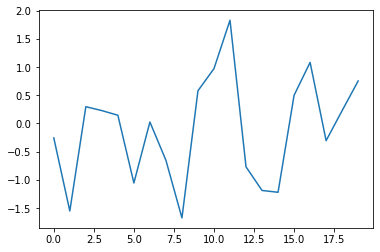

In [45]:
# 꺾은선 그래프

import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0,1)
plt.plot(x, y)
plt.show()

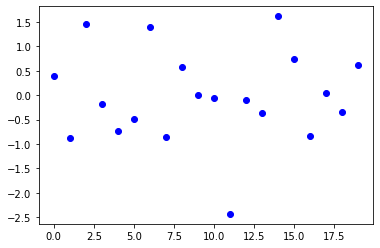

In [46]:
# 점 그래프

import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20], 0,1)
plt.plot(x, y, 'bo')
plt.show()

In [20]:
# 히스토그램

import matplotlib.pyplot as plt
random_normal = tf.random.normal([10000], 0,1)
# plt.hist(random_normal, bins=1)
# plt.show()

In [22]:
random_normal

<tf.Tensor: shape=(10000,), dtype=float32, numpy=
array([-1.4052776 ,  0.34803516,  0.69243115, ..., -1.0629818 ,
        1.7852718 ,  0.90282923], dtype=float32)>

In [23]:
random_normal = tf.random.normal([10], 0,1)

In [24]:
random_normal

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.95703936, -0.01144401,  0.6402869 , -0.13803156,  0.7199692 ,
       -2.3494337 ,  0.52756214,  0.63500345, -1.0530355 ,  1.2171162 ],
      dtype=float32)>

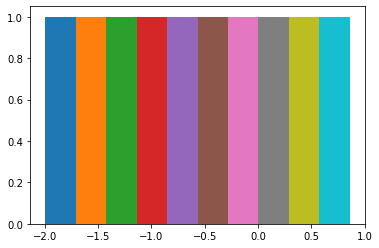

In [25]:
plt.hist(random_normal, bins=1)
plt.show()

### 3.4.2 2-레이어 XOR 네트워크의 정보 시각화

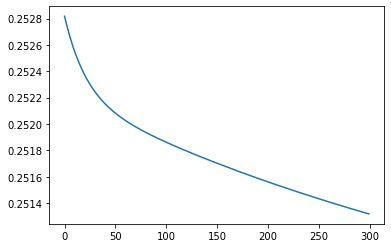

In [17]:
# history 변수에 tf.keras가 학습을 진행한 내역을 저장했던 것 중 loss를 불러와서 그래프를 그림

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

## EOD